# Partition into ordered groups with max size

In [1]:
import math
import networkx as nx
import nxpd

### Desired behavior

- cap the size of groups
- preserve the original order
- prefer larger group sizes
- prefer fewer total groups

In [2]:
def in_groups(arr, maxsize, trace_edge):
    n = len(arr)
    gcd = math.gcd(n, maxsize)
    if n < 1 or maxsize < 1:
        trace_edge(n, 'EMPTY', label='END')
        return
    elif n <= maxsize:
        trace_edge(n, n, label='END')
        yield arr
    elif n < gcd * maxsize:
        yield from in_groups(arr, n // gcd, trace_edge)
    else:
        trace_edge(n, maxsize, label='L')
        yield arr[:maxsize]

        trace_edge(n, n - maxsize, label='R')
        yield from in_groups(arr[maxsize:], maxsize, trace_edge)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
[64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]
[96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]
[128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]
[160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191]
[192, 193, 194, 195, 196, 197, 198, 199, 200]


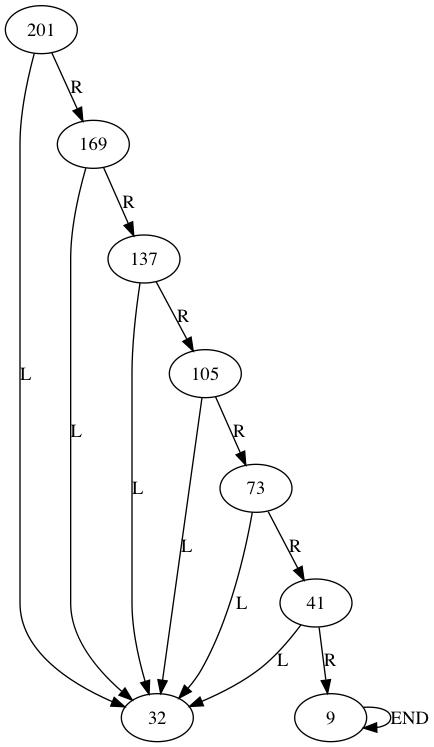

In [3]:
X = list(range(201))
maxsize = 32

G = nx.MultiDiGraph()

groups = []
for g in in_groups(X, maxsize, G.add_edge):
    groups.append(g)
    print(g)

assert len(X) == sum(map(len, groups))
assert sum(X) == sum(map(sum, groups))

nxpd.draw(G, show='ipynb')